In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%store -r daily_consumption_deviation temp_deviation

In [3]:
daily_consumption_deviation.head()

,timestamp,consumption_deviation,month-day
0,2017-01-01,-25.521,01-01
1,2017-01-02,39.706,01-02
2,2017-01-03,-29.565,01-03
3,2017-01-04,-61.049,01-04
4,2017-01-05,2.193,01-05


In [4]:
daily_consumption_deviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
timestamp                365 non-null datetime64[ns]
consumption_deviation    365 non-null float64
month-day                365 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.7+ KB


In [5]:
temp_deviation.head()

,timestamp,temp2017,month-day,avg_tmp,tmp_deviation
0,2017-01-01,29.014634,01-01,41.215905,-12.201271
1,2017-01-02,34.550000,01-02,40.504165,-5.954165
2,2017-01-03,32.521053,01-03,41.480984,-8.959931
3,2017-01-04,39.429787,01-04,40.857500,-1.427713
4,2017-01-05,37.154545,01-05,41.115435,-3.960889


In [6]:
all_data_set = pd.merge(temp_deviation, daily_consumption_deviation, on='timestamp', how='inner')

In [7]:
all_data_set['month'] = all_data_set['timestamp'].apply( lambda x: x.strftime('%m'))
all_data_set['day'] = all_data_set['timestamp'].apply( lambda x: x.strftime('%d'))
all_data_set['weekday'] = ((pd.DatetimeIndex(all_data_set.timestamp).dayofweek) // 5 == 1)
all_data_set.head()

,timestamp,temp2017,month-day_x,avg_tmp,tmp_deviation,consumption_deviation,month-day_y,month,day,weekday
0,2017-01-01,29.014634,01-01,41.215905,-12.201271,-25.521,01-01,01,01,True
1,2017-01-02,34.550000,01-02,40.504165,-5.954165,39.706,01-02,01,02,False
2,2017-01-03,32.521053,01-03,41.480984,-8.959931,-29.565,01-03,01,03,False
3,2017-01-04,39.429787,01-04,40.857500,-1.427713,-61.049,01-04,01,04,False
4,2017-01-05,37.154545,01-05,41.115435,-3.960889,2.193,01-05,01,05,False


In [8]:
all_data_set.loc[all_data_set['consumption_deviation'] >=0,'consumption_label'] = 's'
all_data_set.loc[all_data_set['consumption_deviation'] <0,'consumption_label'] = 'd'
all_data_set.head()

,timestamp,temp2017,month-day_x,avg_tmp,tmp_deviation,consumption_deviation,month-day_y,month,day,weekday,consumption_label
0,2017-01-01,29.014634,01-01,41.215905,-12.201271,-25.521,01-01,01,01,True,d
1,2017-01-02,34.550000,01-02,40.504165,-5.954165,39.706,01-02,01,02,False,s
2,2017-01-03,32.521053,01-03,41.480984,-8.959931,-29.565,01-03,01,03,False,d
3,2017-01-04,39.429787,01-04,40.857500,-1.427713,-61.049,01-04,01,04,False,d
4,2017-01-05,37.154545,01-05,41.115435,-3.960889,2.193,01-05,01,05,False,s


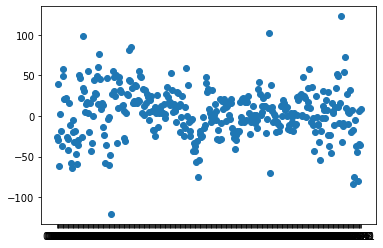

In [9]:
 plt.scatter(all_data_set['month-day_x'], all_data_set['consumption_deviation'])

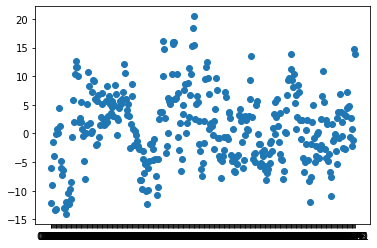

In [10]:
plt.scatter(all_data_set['month-day_x'], all_data_set['tmp_deviation'])

In [11]:
summer_data = all_data_set[(all_data_set['timestamp']>='2017-03-29') & (all_data_set['timestamp']<'2017-10-25')]
summer_data.tail()

,timestamp,temp2017,month-day_x,avg_tmp,tmp_deviation,consumption_deviation,month-day_y,month,day,weekday,consumption_label
292,2017-10-20,57.3500,10-20,51.988886,5.361114,27.151,10-20,10,20,False,s
293,2017-10-21,57.8750,10-21,51.226649,6.648351,-0.240,10-21,10,21,True,d
294,2017-10-22,51.9125,10-22,51.053750,0.858750,1.240,10-22,10,22,True,s
295,2017-10-23,54.3500,10-23,51.509248,2.840752,48.078,10-23,10,23,False,s
296,2017-10-24,60.7625,10-24,52.214538,8.547962,24.880,10-24,10,24,False,s


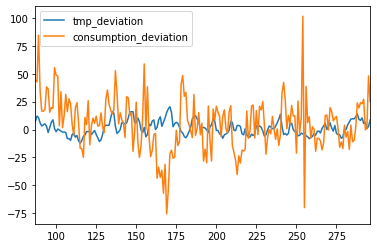

In [12]:
summer_data[['tmp_deviation','consumption_deviation']].plot()

In [13]:
winter_data = all_data_set[(all_data_set['timestamp']<'2017-03-29') | (all_data_set['timestamp']>='2017-10-25')]
winter_data.head()

,timestamp,temp2017,month-day_x,avg_tmp,tmp_deviation,consumption_deviation,month-day_y,month,day,weekday,consumption_label
0,2017-01-01,29.014634,01-01,41.215905,-12.201271,-25.521,01-01,01,01,True,d
1,2017-01-02,34.550000,01-02,40.504165,-5.954165,39.706,01-02,01,02,False,s
2,2017-01-03,32.521053,01-03,41.480984,-8.959931,-29.565,01-03,01,03,False,d
3,2017-01-04,39.429787,01-04,40.857500,-1.427713,-61.049,01-04,01,04,False,d
4,2017-01-05,37.154545,01-05,41.115435,-3.960889,2.193,01-05,01,05,False,s


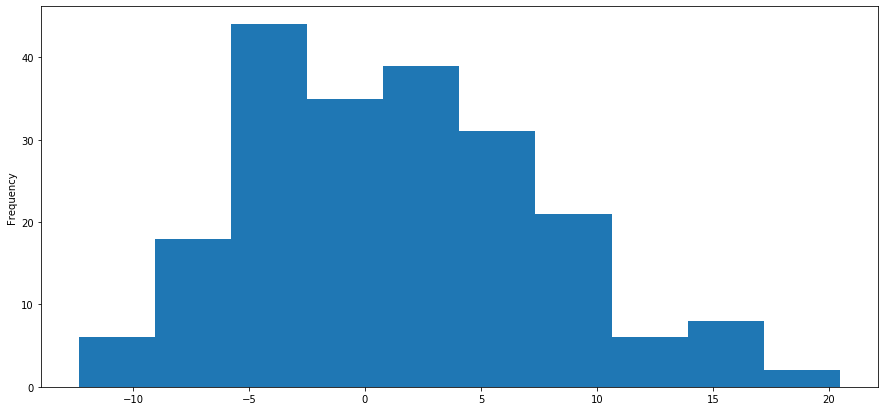

In [14]:
summer_data['tmp_deviation'].plot(kind='hist', figsize=(15,7))

In [15]:
moderate_summer_deviation = summer_data[(summer_data['tmp_deviation'] >=-5) & (summer_data['tmp_deviation']<=5)]
moderate_summer_deviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 91 to 295
Data columns (total 11 columns):
timestamp                116 non-null datetime64[ns]
temp2017                 116 non-null float64
month-day_x              116 non-null object
avg_tmp                  116 non-null float64
tmp_deviation            116 non-null float64
consumption_deviation    116 non-null float64
month-day_y              116 non-null object
month                    116 non-null object
day                      116 non-null object
weekday                  116 non-null bool
consumption_label        116 non-null object
dtypes: bool(1), datetime64[ns](1), float64(4), object(5)
memory usage: 10.1+ KB


In [21]:
extreme_summer_deviation = summer_data[(summer_data['tmp_deviation'] <-5) | (summer_data['tmp_deviation']>5)]
extreme_summer_deviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 87 to 296
Data columns (total 11 columns):
timestamp                94 non-null datetime64[ns]
temp2017                 94 non-null float64
month-day_x              94 non-null object
avg_tmp                  94 non-null float64
tmp_deviation            94 non-null float64
consumption_deviation    94 non-null float64
month-day_y              94 non-null object
month                    94 non-null object
day                      94 non-null object
weekday                  94 non-null bool
consumption_label        94 non-null object
dtypes: bool(1), datetime64[ns](1), float64(4), object(5)
memory usage: 8.2+ KB


In [23]:
moderate_winter_deviation = winter_data[(winter_data['tmp_deviation'] >=-5) & (winter_data['tmp_deviation']<=5)]
moderate_winter_deviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 3 to 362
Data columns (total 11 columns):
timestamp                91 non-null datetime64[ns]
temp2017                 91 non-null float64
month-day_x              91 non-null object
avg_tmp                  91 non-null float64
tmp_deviation            91 non-null float64
consumption_deviation    91 non-null float64
month-day_y              91 non-null object
month                    91 non-null object
day                      91 non-null object
weekday                  91 non-null bool
consumption_label        91 non-null object
dtypes: bool(1), datetime64[ns](1), float64(4), object(5)
memory usage: 7.9+ KB


In [22]:
extreme_winter_deviation = winter_data[(winter_data['tmp_deviation'] <-5) | (winter_data['tmp_deviation']>5)]
extreme_winter_deviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 364
Data columns (total 11 columns):
timestamp                64 non-null datetime64[ns]
temp2017                 64 non-null float64
month-day_x              64 non-null object
avg_tmp                  64 non-null float64
tmp_deviation            64 non-null float64
consumption_deviation    64 non-null float64
month-day_y              64 non-null object
month                    64 non-null object
day                      64 non-null object
weekday                  64 non-null bool
consumption_label        64 non-null object
dtypes: bool(1), datetime64[ns](1), float64(4), object(5)
memory usage: 5.6+ KB


In [19]:
%store moderate_summer_deviation extreme_summer_deviation moderate_winter_deviation extreme_winter_deviation

Stored 'moderate_summer_deviation' (DataFrame)
Stored 'extreme_summer_deviation' (DataFrame)
Stored 'moderate_winter_deviation' (DataFrame)
Stored 'extreme_winter_deviation' (DataFrame)


In [20]:
%store winter_data summer_data

Stored 'winter_data' (DataFrame)
Stored 'summer_data' (DataFrame)
